<a href="https://colab.research.google.com/github/yarkalm/machinelearning/blob/main/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Калмыков Я.А. КЭ-319 ЮУрГУ
# Лабораторная работа по машинному обучению.
# Задание 6
# Оценка и улучшение качества модели

# Кросс-валидация

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 8.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=d2c53ff1ce93abeaaa9619fd6cc62bf3027186bd09c61bcb8cea3029e1410da5
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

- Загрузите набор данных по раку молочной железы с помощью функции load_breast_cancer из scikit-learn.
- Создайте экземпляр модели LogisticRegression и рассчитайте для него среднюю правильность перекрестной проверки на наборе данных, указав значение параметра cv равным 5.


In [ ]:
# Загрузка датасета
cancer = load_breast_cancer()

lr = LogisticRegression()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
scores = cross_val_score(lr,X_scaled,cancer.target,cv=5)
print("Правильность перекрёстной проверки", scores.mean())

Правильность перекрёстной проверки 0.9806862288464524


# Решётчатый поиск

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

- Загрузите набор данных по раку молочной железы с помощью функции load_breast_cancer из scikit-learn. Разбейте его на обучающий и тестовый наборы.
- Создайте экземпляр модели SVC и задайте сетку параметров, используя значения gamma равные 0,0001, 0,001, 0,01, 0,1, 1 и значения C равные 0,001, 0,01, 0,1, 1, 10. 
- Воспользуйтесь GridSearchCV для поиска лучших параметров на обучающем наборе данных, указав значение параметра cv равным 5.


In [ ]:
cancer = load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=1)

params = {'C': [0.001,0.01,0.1,1,10],'gamma':[0.0001,0.001,0.01,0.1,1]}

gs = GridSearchCV(SVC(), params, cv=5)
gs.fit(X_train,y_train)

print("Правильность на тестовом наборе:{:.2f}".format(gs.score(X_test,y_test)))

Правильность на тестовом наборе:0.94


 Выведите наилучшие значения параметров и кросс-валидационной правильности. Оцените правильность наилучшей модели на тестовом наборе данных.

In [ ]:
print("Наилучшие значения параметров: ",gs.best_params_)
print("Наилучшие значение правильности: ",gs.best_score_)

Наилучшие значения параметров:  {'C': 1, 'gamma': 0.0001}
Наилучшие значение правильности:  0.9319562243502053


# Метрики для бинарной классификации

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

- Загрузите набор данных по раку молочной железы с помощью функции load_breast_cancer из scikit-learn. Обозначьте примеры с злокачественными опухолями как положительные, а примеры с доброкачественными опухолями – как отрицательные:
- Отбросьте часть положительных примеров таким образом, чтобы их количество составляло около 10% от общего количества примеров:

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target == 0
X_positive = X[Y]
Y_positive = Y[Y]
X_negative = X[Y == False]
Y_negative = Y[Y == False]

n_positive = int(len(X_negative) / 9)
X_positive = X_positive[0:n_positive]
Y_positive = Y_positive[0:n_positive]

X = np.append(X_negative, X_positive, axis = 0)
Y = np.append(Y_negative, Y_positive, axis = 0)

- Разбейте полученный набор данных на обучающий и тестовый наборы.
- Создайте экземпляр модели DummyClassifier и обучите его на обучающем наборе данных, указав значение параметра strategy равным “most_frequent”. Оцените правильность и полноту полученной модели на обучающем и тестовом наборах.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,y_train)
print("Значение правильности на обучающем наборе: ",dummy.score(X_train,y_train))
print("Значение правильности на тестовом наборе: ",dummy.score(X_test,y_test))
print()
print(classification_report(y_test,dummy.predict(X_test)))

Значение правильности на обучающем наборе:  0.9090909090909091
Значение правильности на тестовом наборе:  0.8787878787878788

              precision    recall  f1-score   support

       False       0.88      1.00      0.94        87
        True       0.00      0.00      0.00        12

    accuracy                           0.88        99
   macro avg       0.44      0.50      0.47        99
weighted avg       0.77      0.88      0.82        99



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Создайте экземпляр модели LogisticRegression и обучите его на обучающем наборе данных. Оцените правильность и полноту полученной модели на обучающем и тестовом наборах.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1)

lr = LogisticRegression()
lr.fit(X_train,y_train)

print("Значение правильности на обучающем наборе: ",lr.score(X_train,y_train))
print("Значение правильности на тестовом наборе: ",lr.score(X_test,y_test))
print()
print(classification_report(y_test,lr.predict(X_test)))

Значение правильности на обучающем наборе:  0.98989898989899
Значение правильности на тестовом наборе:  0.9393939393939394

              precision    recall  f1-score   support

       False       0.95      0.99      0.97        87
        True       0.88      0.58      0.70        12

    accuracy                           0.94        99
   macro avg       0.91      0.79      0.83        99
weighted avg       0.94      0.94      0.93        99



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


- Для обученной модели постройте ROC-кривую и рассчитайте значение AUC на тестовом наборе данных.

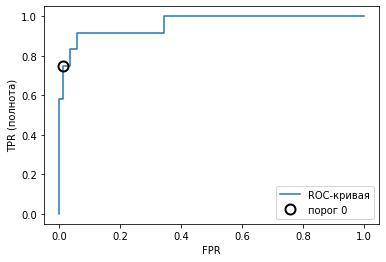

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC-кривая")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
# находим пороговое значение, ближайшее к нулю
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="порог 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [ ]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, lr.decision_function(X_test))
print("AUC для LogisticRegression: {:.3f}".format(lr_auc))

AUC для LogisticRegression: 0.962
